In [103]:
import sqlite3
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import nltk
from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [29]:
db_name = 'customer_review_analysis.db'

query = """select name, rating, comment, timestamp_
            from reviews r 
            join users u 
            on r.id = u.id
        """

In [14]:
def connect_db(db_file):
    try:
        conn = sqlite3.connect(os.path.join(os.getcwd(), db_file))
        return conn
    except Exception as e:
        print (e)
    return None

In [37]:
df = pd.read_sql(query, connect_db(db_name))
df

,Name,Rating,Comment,Timestamp_
0,Krystof,5,"Great prices and customer service, shipping pr...","Friday, October 19, 2018 - 7:45:41 PM"
1,JACK,5,easy to find parts,"Friday, October 19, 2018 - 7:45:37 PM"
2,George,5,Excellent. The BEST in the business.,"Friday, October 19, 2018 - 7:35:03 PM"
3,jay,5,Just my latest order from B&H always satisfied...,"Friday, October 19, 2018 - 7:26:05 PM"
4,Chuck,5,"Easy, quick and great website. Found everythin...","Friday, October 19, 2018 - 6:46:44 PM"
5,Richard,5,Once again B&H provided much comparative info ...,"Friday, October 19, 2018 - 6:04:27 PM"
6,SILVIA,5,Always reliable service and products,"Friday, October 19, 2018 - 6:03:41 PM"
7,George,5,B&H is always reliable and dependable. I buy ...,"Friday, October 19, 2018 - 5:52:43 PM"
8,Lynn,5,"I love B&H Photo. So easy to order from, relia...","Friday, October 19, 2018 - 5:49:36 PM"
9,Gordon,5,Been buying from B&H for decades. Always the ...,"Friday, October 19, 2018 - 5:47:27 PM"


In [39]:
df.dtypes

Name          object
Rating         int64
Comment       object
Timestamp_    object
dtype: object

In [40]:
pd.to_datetime(df.Timestamp_)
df.head()

,Name,Rating,Comment,Timestamp_
0,Krystof,5,"Great prices and customer service, shipping pr...","Friday, October 19, 2018 - 7:45:41 PM"
1,JACK,5,easy to find parts,"Friday, October 19, 2018 - 7:45:37 PM"
2,George,5,Excellent. The BEST in the business.,"Friday, October 19, 2018 - 7:35:03 PM"
3,jay,5,Just my latest order from B&H always satisfied...,"Friday, October 19, 2018 - 7:26:05 PM"
4,Chuck,5,"Easy, quick and great website. Found everythin...","Friday, October 19, 2018 - 6:46:44 PM"


In [80]:
def monthly_count():
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
    monthly_reviews = {}
    for month in months:
        counts = df[df.Timestamp_.str.contains('.*?{}\s+\d+,\s+2018.*?'.format(month), case=False)].shape[0]
        monthly_reviews[month] = counts
    return monthly_reviews

ret = monthly_count()
print (ret)

{'january': 2073, 'february': 2040, 'march': 1943, 'april': 1797, 'may': 2199, 'june': 2140, 'july': 2136, 'august': 1960, 'september': 908, 'october': 920, 'november': 0, 'december': 0}


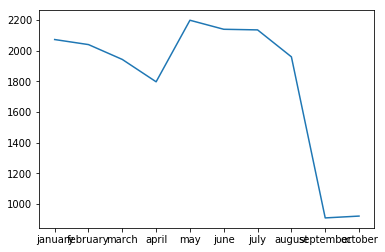

In [81]:
plt.plot(ans.keys(), ans.values())
plt.show()

## Tokenization and Stemming

In [92]:
# Import English Stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [98]:
# Listify comments from dataframe
comments = df.Comment.tolist()
comments[:5]

['Great prices and customer service, shipping prices are either free or priced fairly.', 'easy to find parts', 'Excellent. The BEST in the business.', 'Just my latest order from B&H always satisfied with products and service !', 'Easy, quick and great website. Found everything I needed fast.']

In [109]:
len(comments)

19880

In [104]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenization(text):
    """tokenize sentences and words; filter out tokens not containing letters"""
    tokens = []
    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word not in stopwords:
                tokens.append(word)
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

def tokenization_and_stemming(text):
    """tokenize and stem sentences and words"""
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word not in stopwords]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [105]:
comments_stemmed = []
comments_tokenized = []

for c in comments:
    
    token_stem_res = tokenization_and_stemming(c)
    comments_stemmed.extend(token_stem_res)
    
    tokenized_res = tokenization(c)
    comments_tokenized.extend(tokenized_res)

In [110]:
len(comments_stemmed)

196617

In [111]:
len(comments_tokenized)

196617

In [107]:
stem_token_mapper = {comments_stemmed[i]:comments_tokenized[i] for i in range(len(comments_stemmed))}
print (stem_token_mapper)

{'great': 'Great', 'price': 'prices', 'custom': 'customer', 'servic': 'service', 'ship': 'shipping', 'either': 'either', 'free': 'free', 'fair': 'fair', 'easi': 'Easy', 'find': 'Find', 'part': 'part', 'excel': 'excellent', 'the': 'The', 'best': 'best', 'busi': 'business', 'just': 'Just', 'latest': 'latest', 'order': 'order', 'b': 'B', 'h': 'H', 'alway': 'Always', 'satisfi': 'satisfied', 'product': 'products', 'quick': 'quick', 'websit': 'website', 'found': 'found', 'everyth': 'everything', 'i': 'I', 'need': 'needs', 'fast': 'fast', 'onc': 'Once', 'provid': 'provided', 'much': 'much', 'compar': 'compare', 'info': 'info', 'altern': 'alternate', 'allow': 'allow', 'make': 'make', 'well-inform': 'well-informed', 'decis': 'decisions', 'purchas': 'purchased', 'process': 'process', 'reliabl': 'reliable', 'depend': 'dependable', 'buy': 'buy', 'whenev': 'Whenever', 'possibl': 'possibly', 'love': 'Love', 'photo': 'Photo', 'so': 'So', 'deal': 'deals', 'ever': 'ever', 'concern': 'concerning', 'type

In [108]:
len(stem_token_mapper)

6741

## TF-IDF

In [113]:
#define vectorizer parameters
tfidf_model = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(comments) #fit the vectorizer to comments

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " comments and " + str(tfidf_matrix.shape[1]) + " terms.")

In total, there are 19880 comments and 7 terms.


In [114]:
tf_selected_words = tfidf_model.get_feature_names()
tf_selected_words

['alway', 'b', 'easi', 'great', 'h', 'price', 'servic']

In [115]:
from sklearn.metrics.pairwise import cosine_similarity
cos_matrix = cosine_similarity(tfidf_matrix)
print (cos_matrix)

[[1.         0.         0.         ... 0.28129143 0.68354226 0.18743241]
 [0.         1.         0.         ... 0.         0.60546603 0.74565859]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.28129143 0.         0.         ... 1.         0.54105068 0.66632819]
 [0.68354226 0.60546603 0.         ... 0.54105068 1.         0.81198827]
 [0.18743241 0.74565859 0.         ... 0.66632819 0.81198827 1.        ]]
